# Лабораторна робота 1: Базові алгоритми класифікації з використанням бібліотеки Scikit-learn

**Виконав:** Бондар Петро

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Вибір та завантаження датасету

Для виконання цієї лабораторної роботи було обрано датасет оцінки рівнів ожиріння в людей з Мексико, Перу та Колумбії віком від 14 до 61.

Посилання на датасет: https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster

Для початку завантажимо датасет, та змінимо назви деяких колонок для зручності.

In [2]:
df_obesity = pd.read_csv("data/ObesityDataSet.csv")
df_obesity = df_obesity.rename(columns={'family_history_with_overweight': 'FAM_OVERWEIGHT', 'NObeyesdad': 'Obesity_level'})
TARGET_VAR = 'Obesity_level'
OTHER_FEATURES = df_obesity.columns.drop(['Obesity_level'])

## Загальний огляд

Проведемо загальний огляд датасету. Він включає в себе 2111 запис та 17 колонок (атрибутів).

In [3]:
df_obesity.shape

(2111, 17)

In [4]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   FAM_OVERWEIGHT  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity_level   2111 non-null   object 
dtypes: float64(8), object(9)
memory u

Розглянемо власне колонки (атрибути) з цього датасету:
* **Gender**: стать особи (Male/Female);
* **Age**: вік особи (14-61);
* **Height**: зріст особи;
* **FAM_OVERWEIGHT**: чи хтось з сім'ї страждав на ожиріння (yes/no);
* **FAVC**: часте вживання висококалорійної їжі (yes/no);
* **FCVC**: частота вживання овочів в раціоні (1-3);
* **NCP**: кількість основних прийомів їжі (1-4);
* **CAEC**: частота перекусів (Always/Frequently/Sometimes/no);
* **SMOKE**: чи є особа курцем (yes/no);
* **CH2O**: добове вживання води (1-3);
* **SCC**: чи відслідковує особа кількість калорій в їжі (yes/no);
* **FAF**: частота фізичної активності (0-3);
* **TUE**: час використання "технологічних" пристроїв (0-2);
* **CALC**: частота вживання алкоголю (Always/Frequently/Sometimes/no);
* **MTRANS**: основний спосіб пересування (Пішки/Велосипед/Громадський транспорт/Мотоцикл/Автомобіль);
* **Obesity_level**: визначений рівень ожиріння (або його відсутність).

In [5]:
df_obesity

Gender        Age    Height      Weight FAM_OVERWEIGHT FAVC  FCVC  NCP  \
0     Female  21.000000  1.620000   64.000000            yes   no   2.0  3.0   
1     Female  21.000000  1.520000   56.000000            yes   no   3.0  3.0   
2       Male  23.000000  1.800000   77.000000            yes   no   2.0  3.0   
3       Male  27.000000  1.800000   87.000000             no   no   3.0  3.0   
4       Male  22.000000  1.780000   89.800000             no   no   2.0  1.0   
...      ...        ...       ...         ...            ...  ...   ...  ...   
2106  Female  20.976842  1.710730  131.408528            yes  yes   3.0  3.0   
2107  Female  21.982942  1.748584  133.742943            yes  yes   3.0  3.0   
2108  Female  22.524036  1.752206  133.689352            yes  yes   3.0  3.0   
2109  Female  24.361936  1.739450  133.346641            yes  yes   3.0  3.0   
2110  Female  23.664709  1.738836  133.472641            yes  yes   3.0  3.0   

           CAEC SMOKE      CH2O  SCC       FAF       TUE        CALC  \
0     Sometimes    no  2.000000   no  0.000000  1.000000          no   
1     Sometimes   yes  3.000000  yes  3.000000  0.000000   Sometimes   
2     Sometimes    no  2.000000   no  2.000000  1.000000  Frequently   
3     Sometimes    no  2.000000   no  2.000000  0.000000  Frequently   
4     Sometimes    no  2.000000   no  0.000000  0.000000   Sometimes   
...         ...   ...       ...  ...       ...       ...         ...   
2106  Sometimes    no  1.728139   no  1.676269  0.906247   Sometimes   
2107  Sometimes    no  2.005130   no  1.341390  0.599270   Sometimes   
2108  Sometimes    no  2.054193   no  1.414209  0.646288   Sometimes   
2109  Sometimes    no  2.852339   no  1.139107  0.586035   Sometimes   
2110  Sometimes    no  2.863513   no  1.026452  0.714137   Sometimes   

                     MTRANS        Obesity_level  
0     Public_Transportation        Normal_Weight  
1     Public_Transportation        Normal_Weight  
2     Public_Transportation        Normal_Weight  
3                   Walking   Overweight_Level_I  
4     Public_Transportation  Overweight_Level_II  
...                     ...                  ...  
2106  Public_Transportation     Obesity_Type_III  
2107  Public_Transportation     Obesity_Type_III  
2108  Public_Transportation     Obesity_Type_III  
2109  Public_Transportation     Obesity_Type_III  
2110  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

## Зведення категоріальних даних до неперервних чи числових

Для підрахунку матриці кореляцій, графіків, а також для побудови класифікаторів доречно перевести категоріальні дані в числові.

Для цієї задачі можна було використати encoder, як, наприклад, LabelEncoder. Але, так як мені необхідно було мати більший контроль над "відстанню" між різними значеннями критерію в деяких випадках, було вирішено задати градацію вручну.

### Спосіб пересування
Спосіб пересування перетворимо у відповідності до зменшення рівня рухливості:
* Ходіння $\rightarrow\; 0.0$ 
* Велосипед $\rightarrow\; 0.15$ 
* Громадський транспорт $\rightarrow\; 0.5$ 
* Мотоцикл $\rightarrow\; 0.75$ 
* Автомобіль $\rightarrow\; 1.0$ 

In [6]:
set(df_obesity['MTRANS'])

{'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking'}

In [7]:
# Walking -> 0
# Bike -> 0.15
# Public -> 0.5
# Motor -> 0.75
# Automobile -> 1

df_obesity['MTRANS'] = df_obesity['MTRANS'].map({'Walking'               : 0.0, 
                                                 'Bike'                  : 0.15, 
                                                 'Public_Transportation' : 0.5, 
                                                 'Motorbike'             : 0.75, 
                                                 'Automobile'            : 1.0})

### Частоти перекусів та вживання алкоголю

Їх розподілимо рівномірно на відрізку $[0, 1]$.

In [8]:
set(df_obesity['CAEC']), set(df_obesity['CALC'])

({'Always', 'Frequently', 'Sometimes', 'no'},
 {'Always', 'Frequently', 'Sometimes', 'no'})

In [9]:
FREQ_CATEG_to_NUM = {'Always' : 1.0, 'Frequently' : 0.66, 'Sometimes' : 0.33, 'no' : 0.0}

df_obesity['CAEC'] = df_obesity['CAEC'].map(FREQ_CATEG_to_NUM)
df_obesity['CALC'] = df_obesity['CALC'].map(FREQ_CATEG_to_NUM)

### Бінарні дані (Так/Ні) та стать (Чоловіча/Жіноча)

"Так" замінимо на 1, а "Ні" на 0. Аналогічно зі статтю.

In [10]:
set(df_obesity['FAM_OVERWEIGHT']), set(df_obesity['FAVC']), set(df_obesity['SMOKE']), set(df_obesity['SCC'])

({'no', 'yes'}, {'no', 'yes'}, {'no', 'yes'}, {'no', 'yes'})

In [11]:
BIN_CATEG_to_NUM = {'yes' : 1.0, 'no' : 0.0}

df_obesity['FAM_OVERWEIGHT'] = df_obesity['FAM_OVERWEIGHT'].map(BIN_CATEG_to_NUM)
df_obesity['FAVC'] = df_obesity['FAVC'].map(BIN_CATEG_to_NUM)
df_obesity['SMOKE'] = df_obesity['SMOKE'].map(BIN_CATEG_to_NUM)
df_obesity['SCC'] = df_obesity['SCC'].map(BIN_CATEG_to_NUM)

In [12]:
set(df_obesity['Gender'])

{'Female', 'Male'}

In [13]:
df_obesity['Gender'] = df_obesity['Gender'].map({'Male': 1.0, 'Female': 0.0})

### Рівень ожиріння (класи)

Пронумеруємо їх в порядку збільшення ступеню ожиріння.

In [14]:
set(df_obesity['Obesity_level'])

{'Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II'}

In [15]:
OBESITY_TRANSFORM_MAP = {'Insufficient_Weight' : 0,
                         'Normal_Weight'       : 1,
                         'Overweight_Level_I'  : 2,
                         'Overweight_Level_II' : 3,
                         'Obesity_Type_I'      : 4,
                         'Obesity_Type_II'     : 5,
                         'Obesity_Type_III'    : 6}

df_obesity['Obesity_level'] = df_obesity['Obesity_level'].map(OBESITY_TRANSFORM_MAP)

In [16]:
list(OBESITY_TRANSFORM_MAP.keys())

['Insufficient_Weight',
 'Normal_Weight',
 'Overweight_Level_I',
 'Overweight_Level_II',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III']

## Вигляд датасету після перетворень

In [17]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   float64
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   FAM_OVERWEIGHT  2111 non-null   float64
 5   FAVC            2111 non-null   float64
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   float64
 9   SMOKE           2111 non-null   float64
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   float64
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   float64
 15  MTRANS          2111 non-null   float64
 16  Obesity_level   2111 non-null   int64  
dtypes: float64(16), int64(1)
memory u

In [18]:
df_obesity

Gender        Age    Height      Weight  FAM_OVERWEIGHT  FAVC  FCVC  \
0        0.0  21.000000  1.620000   64.000000             1.0   0.0   2.0   
1        0.0  21.000000  1.520000   56.000000             1.0   0.0   3.0   
2        1.0  23.000000  1.800000   77.000000             1.0   0.0   2.0   
3        1.0  27.000000  1.800000   87.000000             0.0   0.0   3.0   
4        1.0  22.000000  1.780000   89.800000             0.0   0.0   2.0   
...      ...        ...       ...         ...             ...   ...   ...   
2106     0.0  20.976842  1.710730  131.408528             1.0   1.0   3.0   
2107     0.0  21.982942  1.748584  133.742943             1.0   1.0   3.0   
2108     0.0  22.524036  1.752206  133.689352             1.0   1.0   3.0   
2109     0.0  24.361936  1.739450  133.346641             1.0   1.0   3.0   
2110     0.0  23.664709  1.738836  133.472641             1.0   1.0   3.0   

      NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  MTRANS  \
0     3.0  0.33    0.0  2.000000  0.0  0.000000  1.000000  0.00     0.5   
1     3.0  0.33    1.0  3.000000  1.0  3.000000  0.000000  0.33     0.5   
2     3.0  0.33    0.0  2.000000  0.0  2.000000  1.000000  0.66     0.5   
3     3.0  0.33    0.0  2.000000  0.0  2.000000  0.000000  0.66     0.0   
4     1.0  0.33    0.0  2.000000  0.0  0.000000  0.000000  0.33     0.5   
...   ...   ...    ...       ...  ...       ...       ...   ...     ...   
2106  3.0  0.33    0.0  1.728139  0.0  1.676269  0.906247  0.33     0.5   
2107  3.0  0.33    0.0  2.005130  0.0  1.341390  0.599270  0.33     0.5   
2108  3.0  0.33    0.0  2.054193  0.0  1.414209  0.646288  0.33     0.5   
2109  3.0  0.33    0.0  2.852339  0.0  1.139107  0.586035  0.33     0.5   
2110  3.0  0.33    0.0  2.863513  0.0  1.026452  0.714137  0.33     0.5   

      Obesity_level  
0                 1  
1                 1  
2                 1  
3                 2  
4                 3  
...             ...  
2106              6  
2107              6  
2108              6  
2109              6  
2110              6  

[2111 rows x 17 columns]

## Побудова HeatMap для кореляційної матриці та інших графіків

In [19]:
import seaborn as sns

### Матриця кореляцій

Розглянемо кореляції всіх змінних між собою на HeatMap.

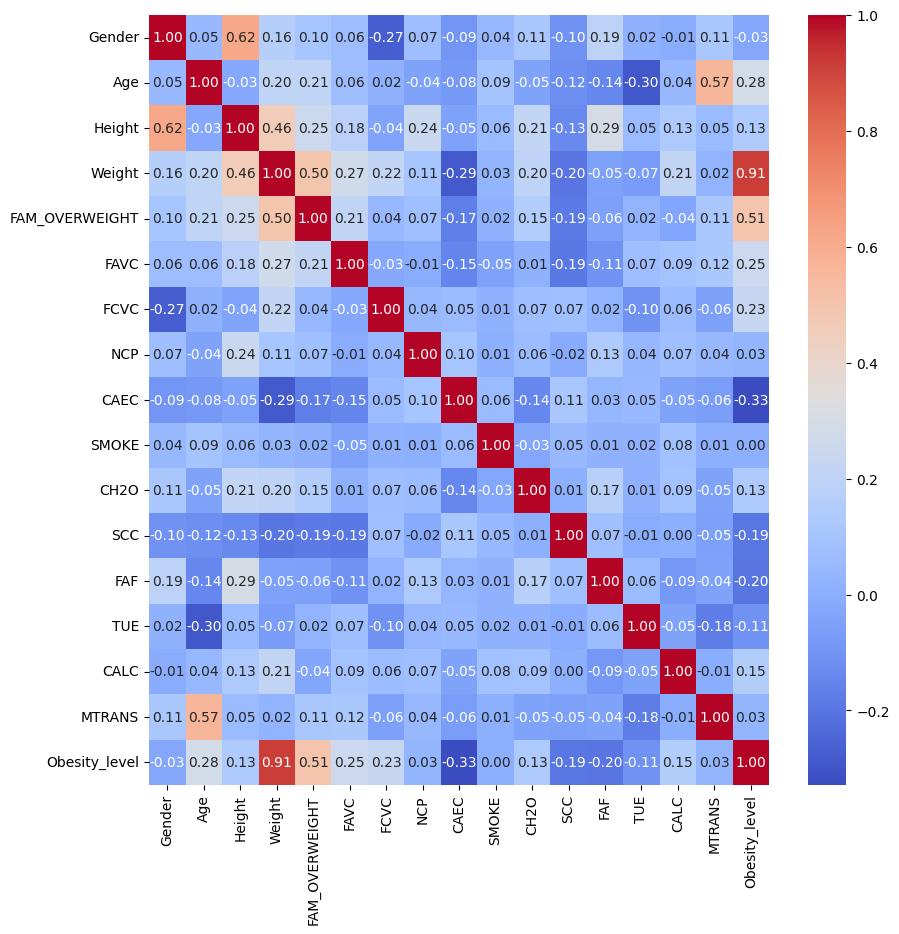

In [20]:
corr = df_obesity.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

### BoxPlots

За допомогою BoxPlot для кожної змінної можна переглянути розподіл значень цієї змінної для кожного з шести класів.

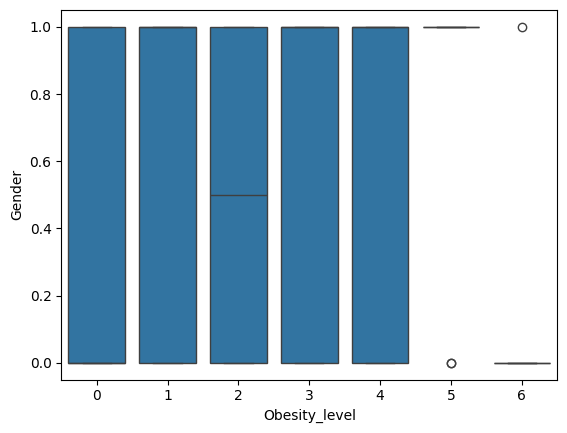

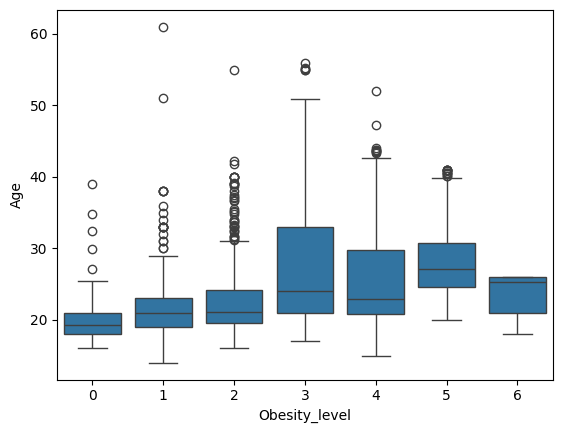

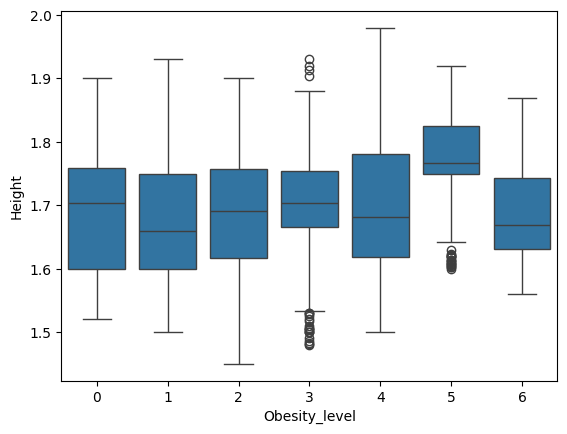

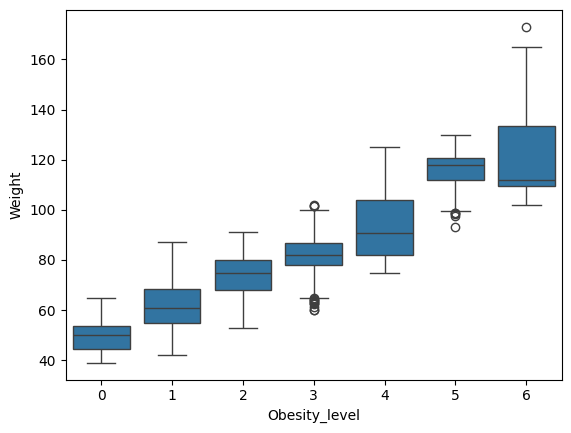

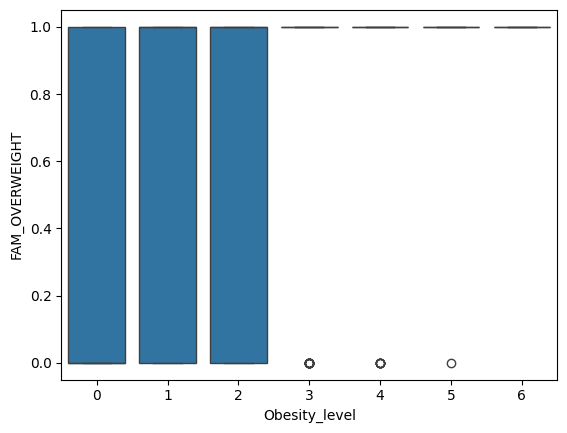

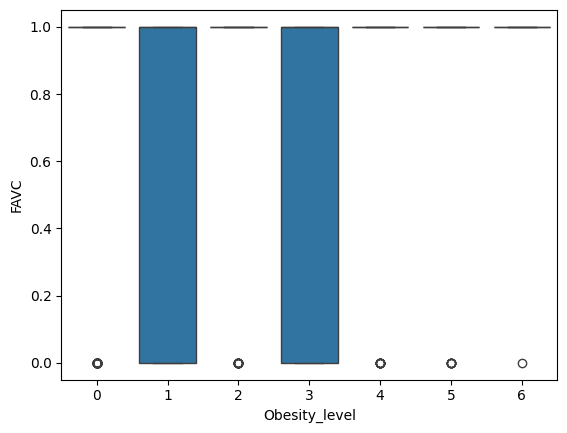

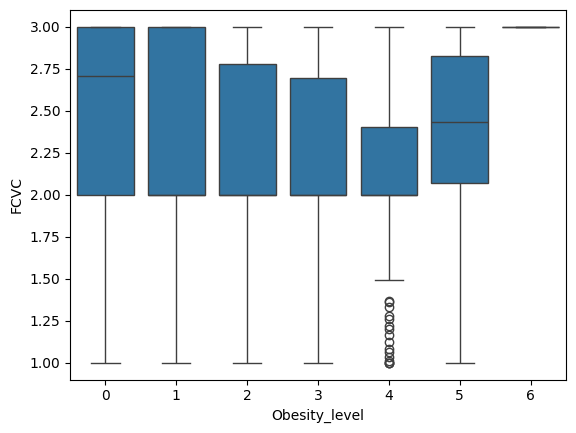

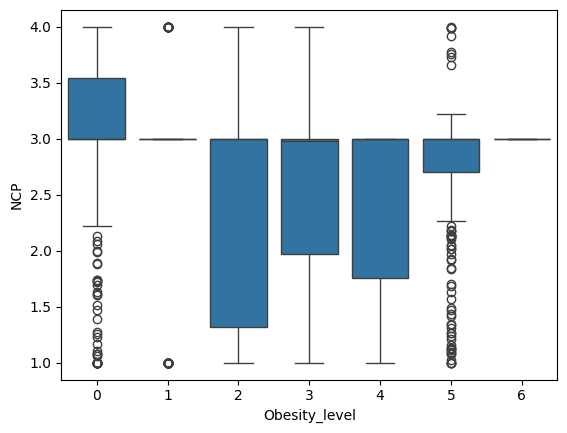

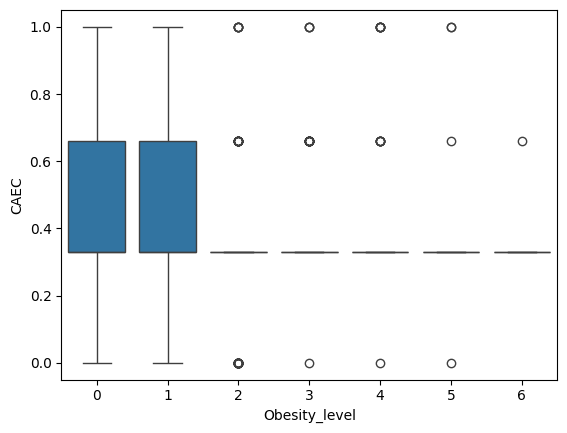

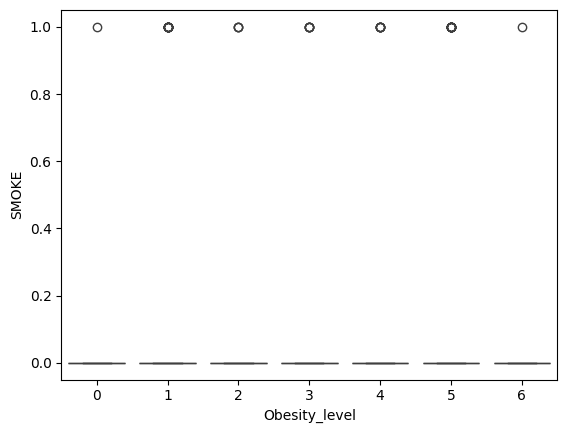

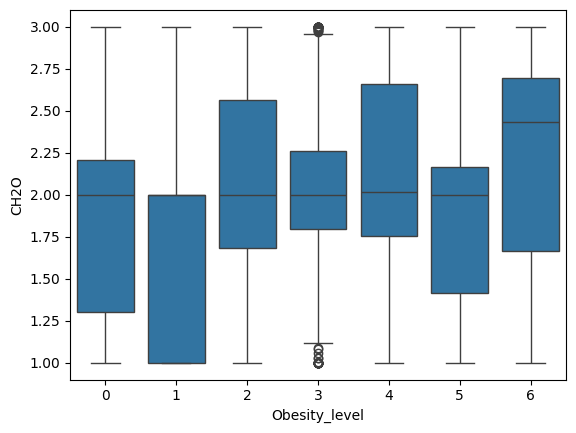

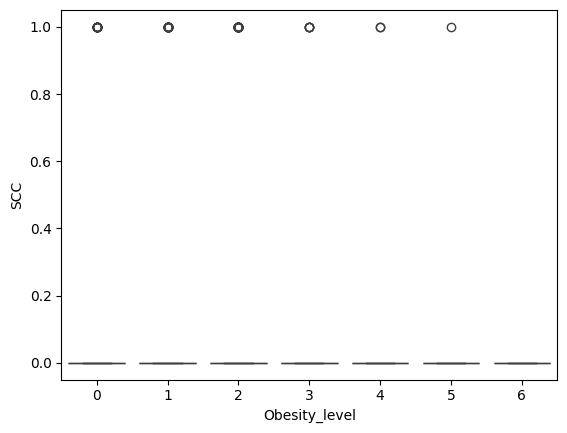

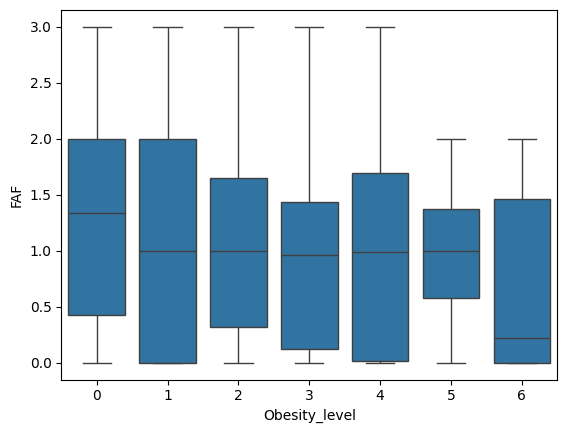

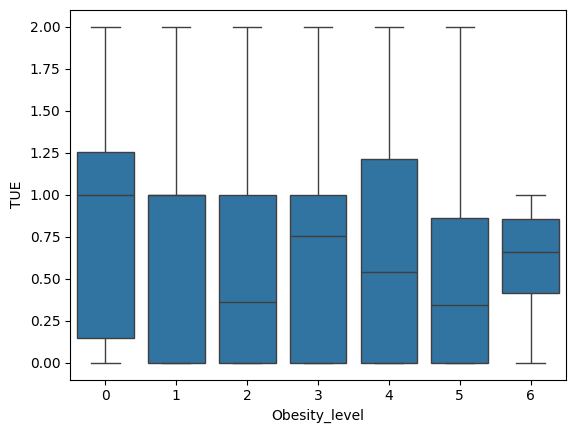

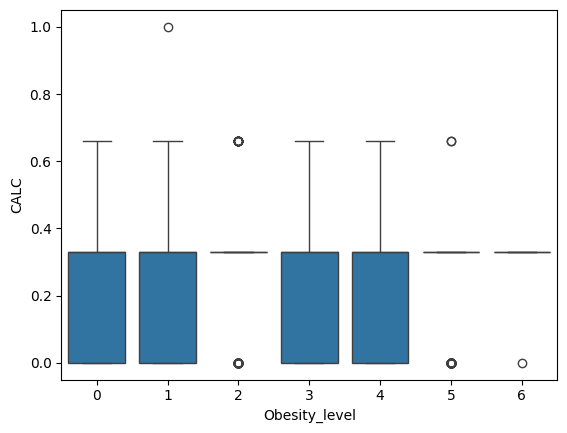

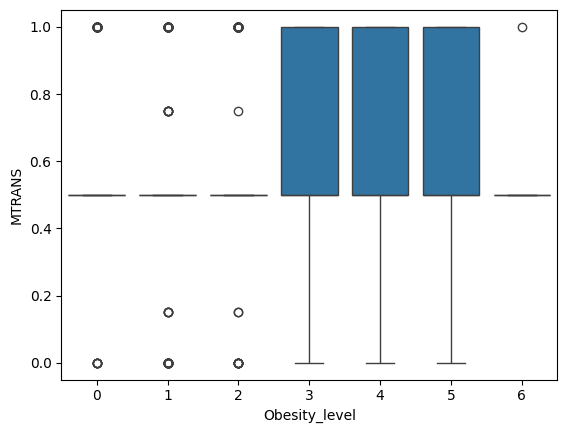

In [21]:
for i in range(len(OTHER_FEATURES)):
    fig_bp = plt.figure()
    ax_bp = sns.boxplot(x=TARGET_VAR, y=OTHER_FEATURES[i], data=df_obesity)

### PairPlot

Аналогічний підхід, але розподіл класів по гістограмам для двох атрибутів. Деякі атрибути, що мають бінаринй розподіл, було виключено для економії місця. :D

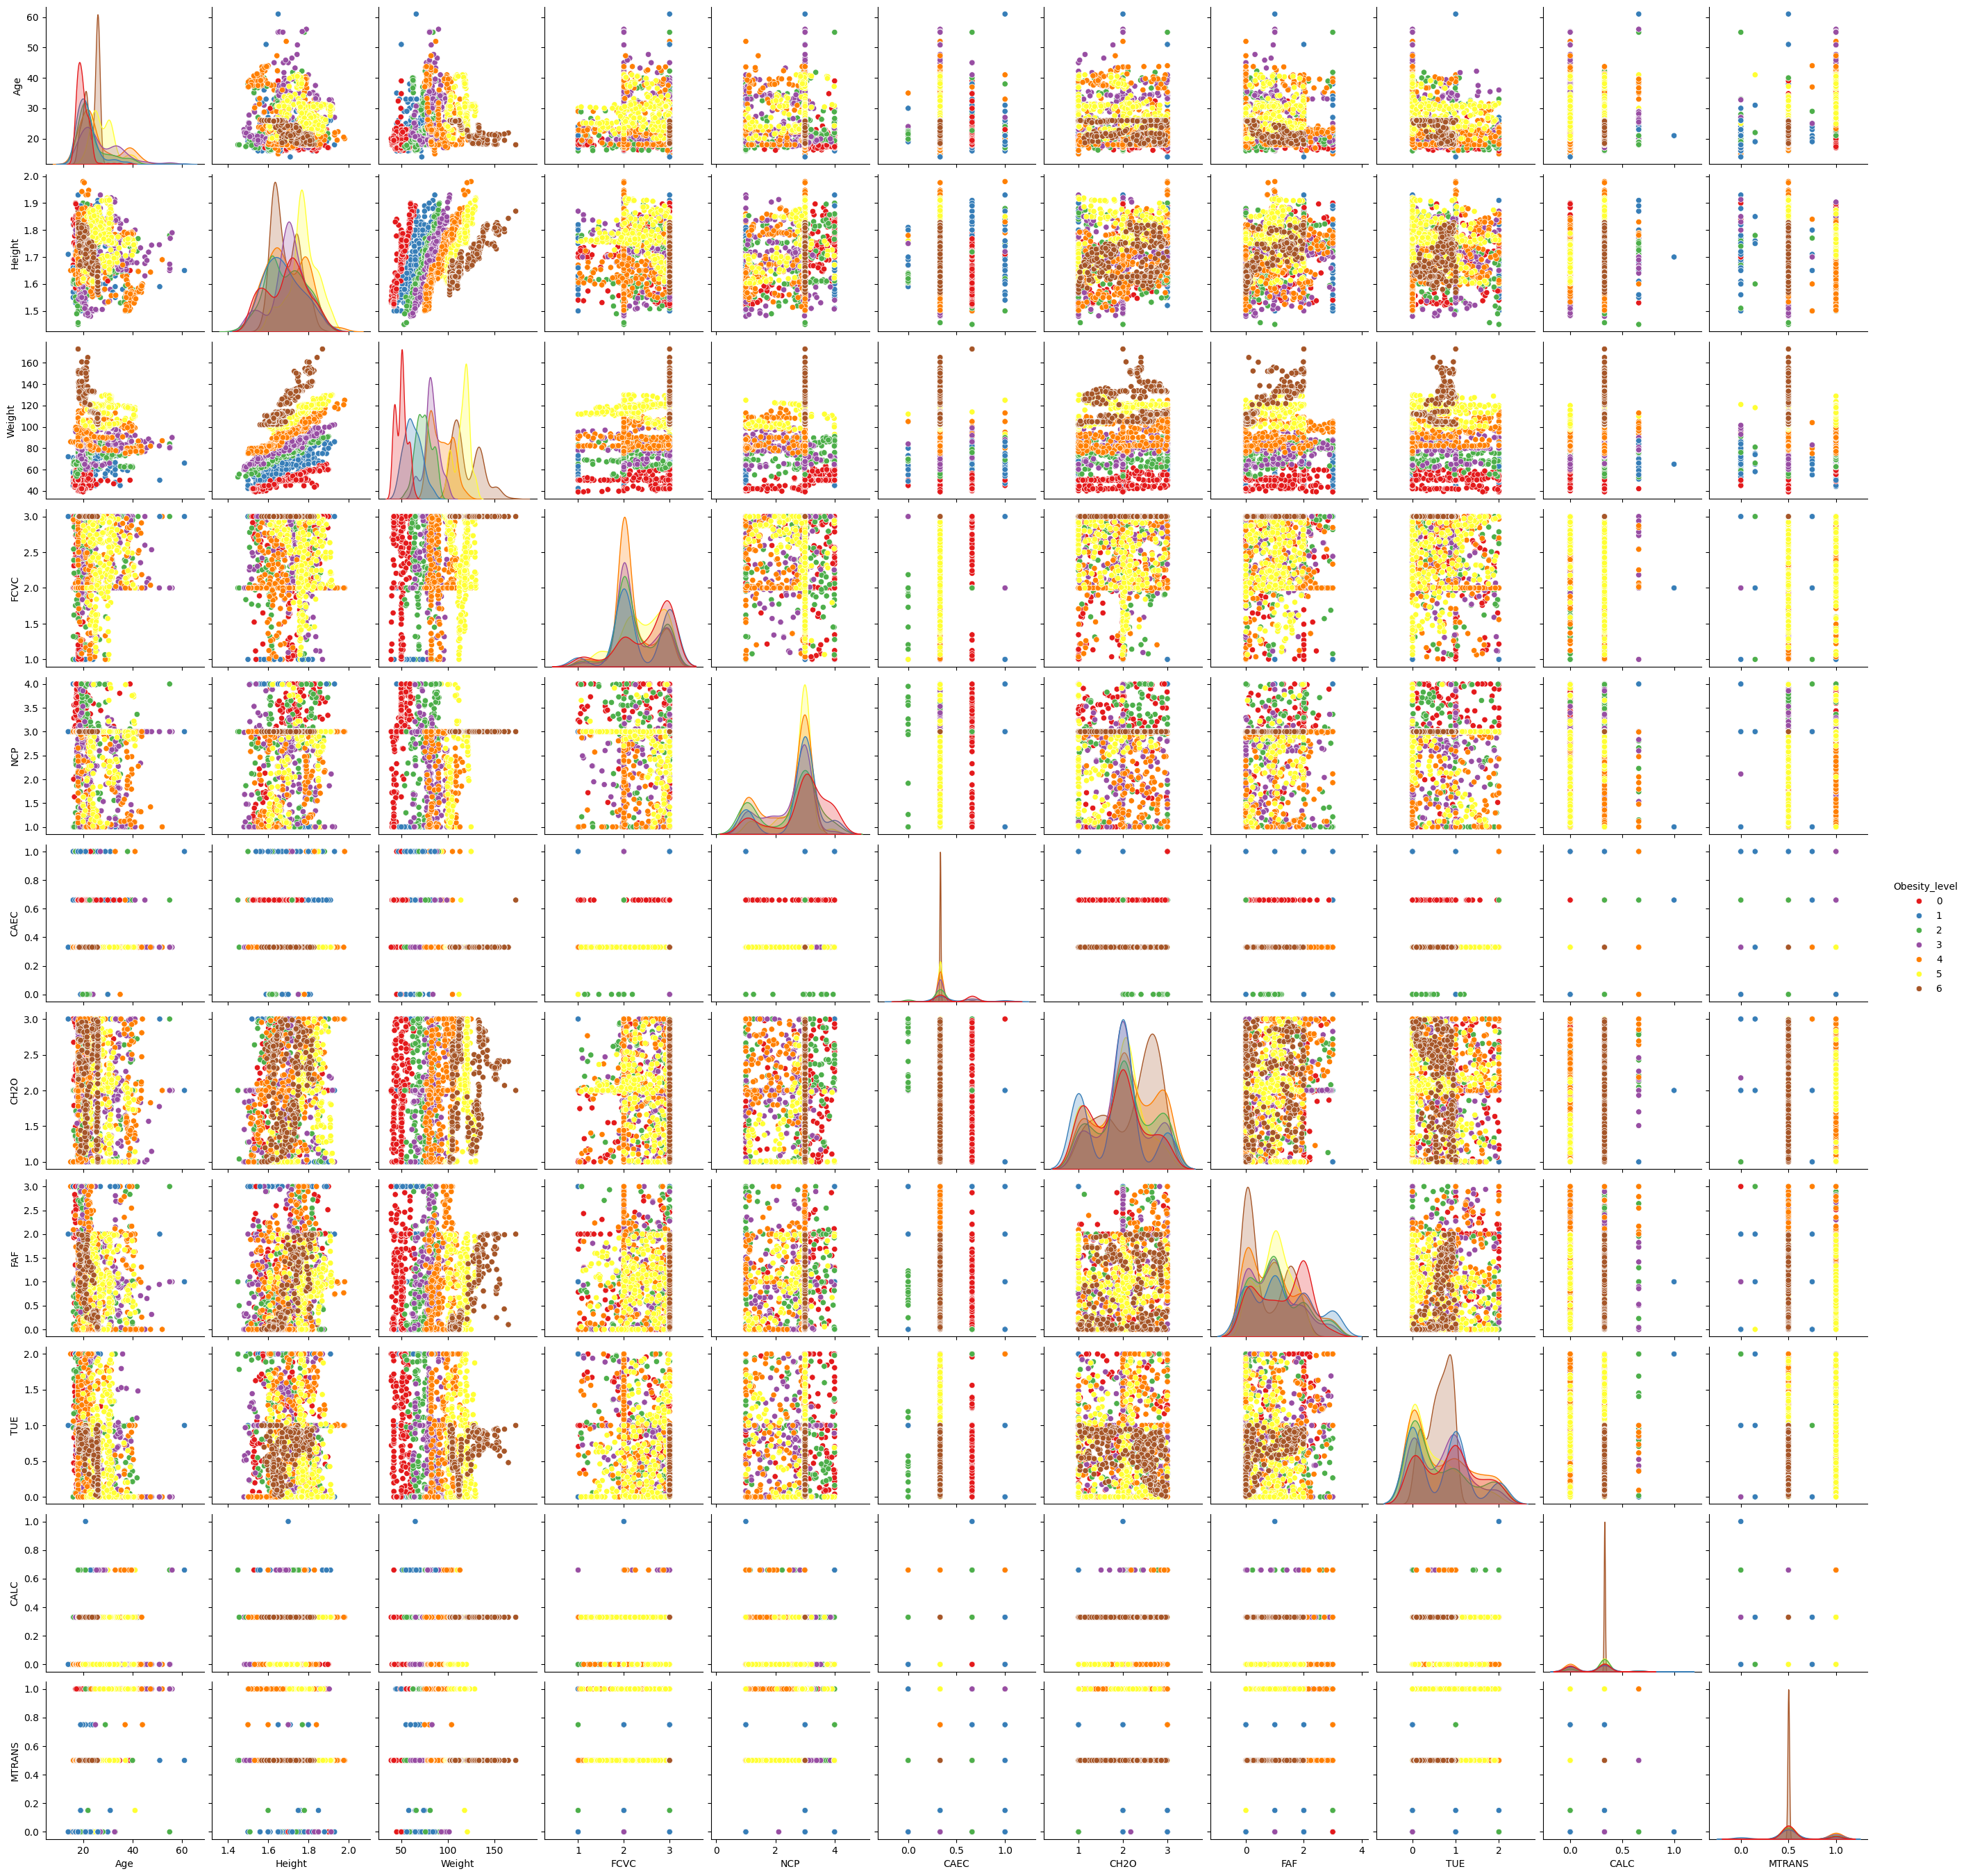

In [22]:
sns.pairplot(df_obesity.drop(['Gender', 'SMOKE', 'FAM_OVERWEIGHT', 'SCC', 'FAVC'], axis=1), hue=TARGET_VAR, palette = 'Set1')

## Підготовка даних для тренування

Повернемо значення "Obesity_level" назад до категоріальних за допомогою LabelEncoder.

In [23]:
from sklearn.preprocessing import LabelEncoder

OBESITY_NAMES_UPD = [f"{code} ({level})" for [level, code] in OBESITY_TRANSFORM_MAP.items()]

enc_m = LabelEncoder()
enc_m.fit(OBESITY_NAMES_UPD)
df_obesity['Obesity_level'] = enc_m.inverse_transform(df_obesity['Obesity_level'])

df_obesity

Gender        Age    Height      Weight  FAM_OVERWEIGHT  FAVC  FCVC  \
0        0.0  21.000000  1.620000   64.000000             1.0   0.0   2.0   
1        0.0  21.000000  1.520000   56.000000             1.0   0.0   3.0   
2        1.0  23.000000  1.800000   77.000000             1.0   0.0   2.0   
3        1.0  27.000000  1.800000   87.000000             0.0   0.0   3.0   
4        1.0  22.000000  1.780000   89.800000             0.0   0.0   2.0   
...      ...        ...       ...         ...             ...   ...   ...   
2106     0.0  20.976842  1.710730  131.408528             1.0   1.0   3.0   
2107     0.0  21.982942  1.748584  133.742943             1.0   1.0   3.0   
2108     0.0  22.524036  1.752206  133.689352             1.0   1.0   3.0   
2109     0.0  24.361936  1.739450  133.346641             1.0   1.0   3.0   
2110     0.0  23.664709  1.738836  133.472641             1.0   1.0   3.0   

      NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  MTRANS  \
0     3.0  0.33    0.0  2.000000  0.0  0.000000  1.000000  0.00     0.5   
1     3.0  0.33    1.0  3.000000  1.0  3.000000  0.000000  0.33     0.5   
2     3.0  0.33    0.0  2.000000  0.0  2.000000  1.000000  0.66     0.5   
3     3.0  0.33    0.0  2.000000  0.0  2.000000  0.000000  0.66     0.0   
4     1.0  0.33    0.0  2.000000  0.0  0.000000  0.000000  0.33     0.5   
...   ...   ...    ...       ...  ...       ...       ...   ...     ...   
2106  3.0  0.33    0.0  1.728139  0.0  1.676269  0.906247  0.33     0.5   
2107  3.0  0.33    0.0  2.005130  0.0  1.341390  0.599270  0.33     0.5   
2108  3.0  0.33    0.0  2.054193  0.0  1.414209  0.646288  0.33     0.5   
2109  3.0  0.33    0.0  2.852339  0.0  1.139107  0.586035  0.33     0.5   
2110  3.0  0.33    0.0  2.863513  0.0  1.026452  0.714137  0.33     0.5   

                Obesity_level  
0           1 (Normal_Weight)  
1           1 (Normal_Weight)  
2           1 (Normal_Weight)  
3      2 (Overweight_Level_I)  
4     3 (Overweight_Level_II)  
...                       ...  
2106     6 (Obesity_Type_III)  
2107     6 (Obesity_Type_III)  
2108     6 (Obesity_Type_III)  
2109     6 (Obesity_Type_III)  
2110     6 (Obesity_Type_III)  

[2111 rows x 17 columns]

Розіб'ємо набір даних на навчальний (75%) і тестовий (25%).

In [24]:
from sklearn.model_selection import train_test_split

X, y = df_obesity.drop(['Obesity_level'], axis=1), df_obesity['Obesity_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### "Стандартизуємо" значення векторів

Для цього застосуємо StandardScaler() на тренувальному та тестувальному наборах даних. Такі значення можна використовувати для навчання всіх п'яти моделей.

Замість стандартизації значення також можна було звести до відрізку $[0, 1]$.

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Модель kNN (k Nearest Neighbors)

Шляхом підбору параметрів було з'ясовано, що в якості ваги найкраще буде використати 'distance', а метрику взяти з $L_2$.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

k_max = 40
p_sel = 2
weight_sel = 'distance'

### Обираємо значення k так, щоб мінімізувати помилку

In [27]:
error_rate = []
for k in range(1, k_max):
    knn_trial = KNeighborsClassifier(n_neighbors=k, p=p_sel, weights=weight_sel)
    knn_trial.fit(X_train, y_train)
    pred_k = knn_trial.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))

k_optimal = np.argmin(error_rate) + 1

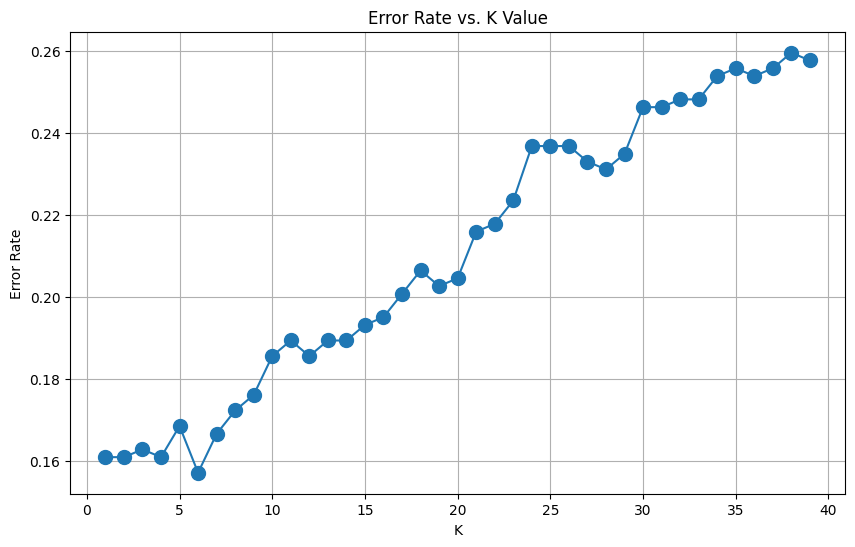

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1, k_max), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [29]:
print(f"Optimal K value is {k_optimal}")

Optimal K value is 6


### Обчислюємо передбачення за допомогою kNN з оптимальним значенням k

In [30]:
knn = KNeighborsClassifier(n_neighbors=k_optimal, p=p_sel, weights=weight_sel)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=np.int64(6), weights='distance')

In [31]:

knn_pred = knn.predict(X_test)

### Оцінюємо точність отриманих передбачень kNN

In [32]:
print(confusion_matrix(y_test, knn_pred))
print()
print(classification_report(y_test, knn_pred))

[[65  3  4  0  0  0  0]
 [16 40  5  8  1  2  0]
 [ 0  5 48  4  6  1  0]
 [ 2  5  1 55  2  5  0]
 [ 0  4  1  1 70  2  0]
 [ 0  1  0  1  2 74  0]
 [ 0  0  0  0  0  1 93]]

                         precision    recall  f1-score   support

0 (Insufficient_Weight)       0.78      0.90      0.84        72
      1 (Normal_Weight)       0.69      0.56      0.62        72
 2 (Overweight_Level_I)       0.81      0.75      0.78        64
3 (Overweight_Level_II)       0.80      0.79      0.79        70
     4 (Obesity_Type_I)       0.86      0.90      0.88        78
    5 (Obesity_Type_II)       0.87      0.95      0.91        78
   6 (Obesity_Type_III)       1.00      0.99      0.99        94

               accuracy                           0.84       528
              macro avg       0.83      0.83      0.83       528
           weighted avg       0.84      0.84      0.84       528



## Модель Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

### Створюємо класифікатор Decision Tree, тренуємо його на навчальному наборі та обчислюємо передбачення

In [34]:
dec_tree = DecisionTreeClassifier(criterion='gini')
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:

dec_t_pred = dec_tree.predict(X_test)

### Оцінюємо точність отриманих передбачень Decision Tree

In [36]:
print(confusion_matrix(y_test, dec_t_pred))
print()
print(classification_report(y_test, dec_t_pred))

[[70  2  0  0  0  0  0]
 [ 3 65  4  0  0  0  0]
 [ 0  4 56  4  0  0  0]
 [ 0  0  6 64  0  0  0]
 [ 0  0  1  3 73  1  0]
 [ 0  0  0  0  2 76  0]
 [ 0  0  0  0  1  0 93]]

                         precision    recall  f1-score   support

0 (Insufficient_Weight)       0.96      0.97      0.97        72
      1 (Normal_Weight)       0.92      0.90      0.91        72
 2 (Overweight_Level_I)       0.84      0.88      0.85        64
3 (Overweight_Level_II)       0.90      0.91      0.91        70
     4 (Obesity_Type_I)       0.96      0.94      0.95        78
    5 (Obesity_Type_II)       0.99      0.97      0.98        78
   6 (Obesity_Type_III)       1.00      0.99      0.99        94

               accuracy                           0.94       528
              macro avg       0.94      0.94      0.94       528
           weighted avg       0.94      0.94      0.94       528



### Дерево, використане для класифікації

In [37]:
plt.figure(figsize = (100, 100))
plot_tree(dec_tree, feature_names=OTHER_FEATURES, 
          class_names=OBESITY_NAMES_UPD, filled = True)
plt.show()

## Модель SVM (Support Vector Machine)

In [38]:
from sklearn.svm import SVC

### Підбираємо найкращі параметри за допомогою Grid Search та навчаємо на тренувальних даних

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C'      : [0.1, 1, 10, 100, 1000],
              'gamma'  : [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel' : ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True)

grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

### Отримані параметри

In [40]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [41]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

### Обчислюємо передбачення

In [42]:
svc_pred = grid.predict(X_test)

### Оцінюємо точність отриманих передбачень SVM

In [43]:
print(confusion_matrix(y_test, svc_pred))
print()
print(classification_report(y_test, svc_pred))

[[72  0  0  0  0  0  0]
 [ 1 66  5  0  0  0  0]
 [ 0  3 58  3  0  0  0]
 [ 0  0  5 65  0  0  0]
 [ 0  0  0  3 75  0  0]
 [ 0  0  0  0  2 76  0]
 [ 0  0  0  0  0  1 93]]

                         precision    recall  f1-score   support

0 (Insufficient_Weight)       0.99      1.00      0.99        72
      1 (Normal_Weight)       0.96      0.92      0.94        72
 2 (Overweight_Level_I)       0.85      0.91      0.88        64
3 (Overweight_Level_II)       0.92      0.93      0.92        70
     4 (Obesity_Type_I)       0.97      0.96      0.97        78
    5 (Obesity_Type_II)       0.99      0.97      0.98        78
   6 (Obesity_Type_III)       1.00      0.99      0.99        94

               accuracy                           0.96       528
              macro avg       0.95      0.95      0.95       528
           weighted avg       0.96      0.96      0.96       528



## Модель Random Forest 

In [44]:
from sklearn.ensemble import RandomForestClassifier

### Тренуємо модель Random Forest та обчислюємо передбачення

Стандартні параметри моделі дають достатньо хороший класифікатор та не викликають проблем із обчислювальними потужностями.

In [45]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)

RandomForestClassifier()

In [46]:

rf_pred = rand_forest.predict(X_test)

### Оцінюємо точність отриманих передбачень Random Forest

In [47]:
print(confusion_matrix(y_test, rf_pred))
print()
print(classification_report(y_test, rf_pred))

[[69  3  0  0  0  0  0]
 [ 1 68  2  1  0  0  0]
 [ 0  3 58  3  0  0  0]
 [ 0  5  1 63  1  0  0]
 [ 0  2  0  1 74  1  0]
 [ 0  1  0  0  0 77  0]
 [ 0  0  0  0  1  0 93]]

                         precision    recall  f1-score   support

0 (Insufficient_Weight)       0.99      0.96      0.97        72
      1 (Normal_Weight)       0.83      0.94      0.88        72
 2 (Overweight_Level_I)       0.95      0.91      0.93        64
3 (Overweight_Level_II)       0.93      0.90      0.91        70
     4 (Obesity_Type_I)       0.97      0.95      0.96        78
    5 (Obesity_Type_II)       0.99      0.99      0.99        78
   6 (Obesity_Type_III)       1.00      0.99      0.99        94

               accuracy                           0.95       528
              macro avg       0.95      0.95      0.95       528
           weighted avg       0.95      0.95      0.95       528



## Модель AdaBoost

In [48]:
from sklearn.ensemble import AdaBoostClassifier

### Тренуємо модель AdaBoost використовуючи стандартний алгоритм та обчислюємо передбачення

In [49]:
ada_boost = AdaBoostClassifier(algorithm='SAMME')
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME')

In [50]:
ab_pred = ada_boost.predict(X_test)

### Оцінюємо точність отриманих передбачень Random Forest

In [51]:
print(confusion_matrix(y_test, ab_pred))
print()
print(classification_report(y_test, ab_pred))

[[71  0  1  0  0  0  0]
 [34 23  9  6  0  0  0]
 [ 2 26  5 31  0  0  0]
 [ 1  6  2 53  7  1  0]
 [ 0  1  0 48 13 16  0]
 [ 0  0  0  1  5 72  0]
 [ 0  0  0  0  0 94  0]]

                         precision    recall  f1-score   support

0 (Insufficient_Weight)       0.66      0.99      0.79        72
      1 (Normal_Weight)       0.41      0.32      0.36        72
 2 (Overweight_Level_I)       0.29      0.08      0.12        64
3 (Overweight_Level_II)       0.38      0.76      0.51        70
     4 (Obesity_Type_I)       0.52      0.17      0.25        78
    5 (Obesity_Type_II)       0.39      0.92      0.55        78
   6 (Obesity_Type_III)       0.00      0.00      0.00        94

               accuracy                           0.45       528
              macro avg       0.38      0.46      0.37       528
           weighted avg       0.37      0.45      0.36       528



C:\Users\Lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

На жаль, не вдалося підібрати такі параметри, щоб стабільно отримувати хорошу точність вгадування. Можливо справа в дата сеті, а можливо в мені... Цього ми ніколи не дізнаємось (до захисту)...

## Фінальне порівняння точності та висновки

In [52]:
print("Results for different Classificators:")
print(f"kNN:\t\t{accuracy_score(y_test, knn_pred)}")
print(f"Decision Tree:\t{accuracy_score(y_test, dec_t_pred)}")
print(f"SVM:\t\t{accuracy_score(y_test, svc_pred)}")
print(f"Random Forest:\t{accuracy_score(y_test, rf_pred)}")
print(f"AdaBoost:\t{accuracy_score(y_test, ab_pred)}")

Results for different Classificators:
kNN:		0.8428030303030303
Decision Tree:	0.9412878787878788
SVM:		0.9564393939393939
Random Forest:	0.9507575757575758
AdaBoost:	0.44886363636363635


**Висновок:** В ході виконання лабораторної роботи, мною було отримано базові навички роботи з датасетами, побудови класифікаторів та оцінки їх якості.
Серед всіх побудованих класифікаторів, в середньому найкраще себе на різних запусках показувув SVM, маючи найбільшу точність. Близькими до нього були Decision Tree та Random Forest з незначним відривом.
З певних причин класифікатор AdaBoost не показав гарного результату, це може бути пов'язано із неправильним підбором параметрів, або просто із непідходящим датасетом (чи тренувальним набором) для тренування.